In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('spaceship_titanic.csv')
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
df.shape

(8693, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [6]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


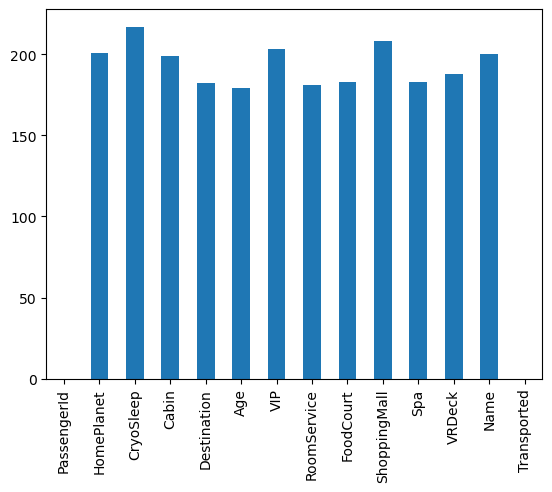

In [7]:
df.isnull().sum().plot.bar()
plt.show()

In [8]:
col = df.loc[:,'RoomService':'VRDeck'].columns
df.groupby('VIP')[col].mean()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
VIP,,,,,
False,217.218527,426.336536,173.876298,301.711045,282.718056
True,473.615385,1811.393782,247.726804,760.710660,1234.856410


In [9]:
df.groupby('CryoSleep')[col].mean()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
CryoSleep,,,,,
False,350.146772,713.004316,270.586504,486.09294,475.716165
True,0.000000,0.000000,0.000000,0.00000,0.000000


In [10]:
temp = df['CryoSleep'] == True
df.loc[temp, col] = 0.0

In [11]:
for c in col:
    for val in [True, False]:
        temp = df['VIP'] == val
        # Calculate mean only for numeric columns
        k = df.loc[temp, c].astype(float).mean()  # Convert to float to ensure numeric calculation
        df.loc[temp, c] = df.loc[temp, c].fillna(k)

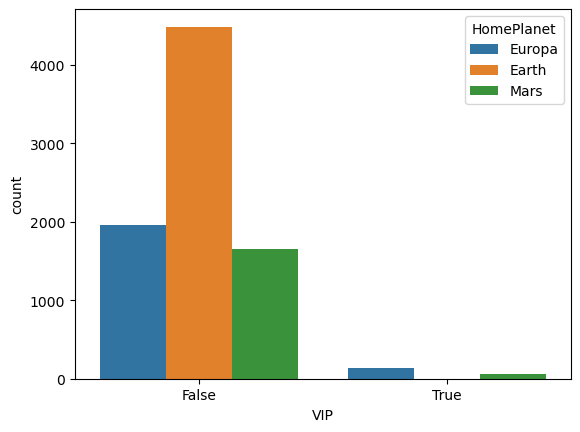

In [12]:
sb.countplot(data=df, x='VIP', hue='HomePlanet')
plt.show()

In [13]:
col = 'HomePlanet'
temp = df['VIP'] == False
df.loc[temp, col] = df.loc[temp, col].fillna('Earth')

temp = df['VIP'] == True
df.loc[temp, col] = df.loc[temp, col].fillna('Europa')

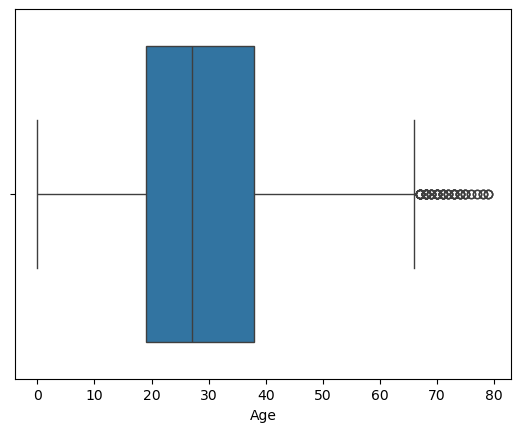

In [14]:
sb.boxplot(df['Age'],orient='h')
plt.show()

In [15]:
temp = df[df['Age'] < 61]['Age'].mean()
df['Age'] = df['Age'].fillna(temp)

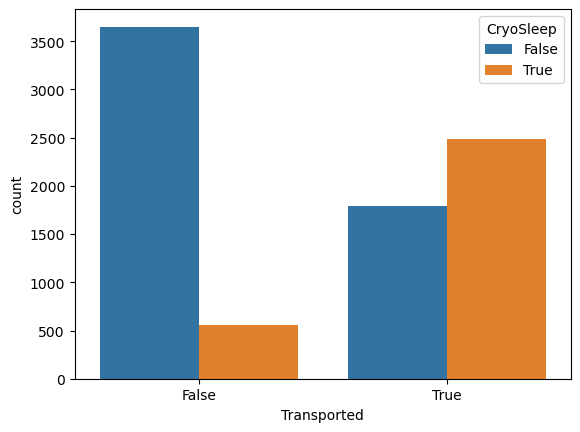

In [16]:
sb.countplot(data=df, x='Transported', hue='CryoSleep')
plt.show()

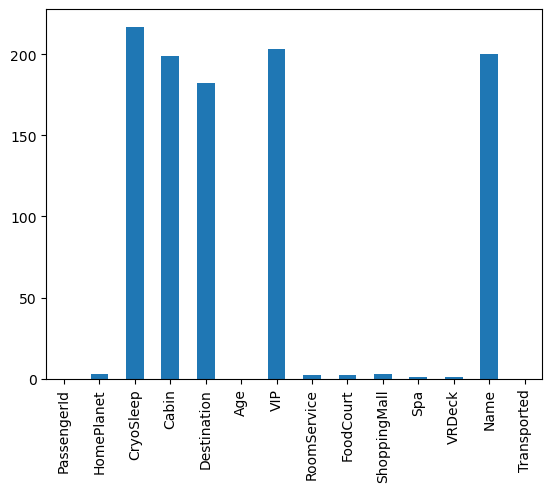

In [17]:
df.isnull().sum().plot.bar()
plt.show()

In [18]:
for col in df.columns:
    if df[col].isnull().sum() == 0:
        continue
        
    # If the data type is categorical filling by mode.
    if df[col].dtype == object or df[col].dtype == bool:
        df[col] = df[col].fillna(df[col].mode()[0])
        
    # Else by mean
    else:
        df[col] = df[col].fillna(df[col].mean())

df.isnull().sum().sum()

0

In [19]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [20]:
new = df["PassengerId"].str.split("_", n=1, expand=True)
new

,0,1
0,0001,01
1,0002,01
2,0003,01
3,0003,02
4,0004,01
...,...,...
8688,9276,01
8689,9278,01
8690,9279,01
8691,9280,01


In [21]:
new = df["PassengerId"].str.split("_", n=1, expand=True)
df["RoomNo"] = new[0].astype(int)
df["PassengerNo"] = new[1].astype(int)

df.drop(['PassengerId', 'Name'], axis=1, inplace=True)

In [22]:
data = df['RoomNo']
for i in range(df.shape[0]):
      temp = data == data[i]
      df['PassengerNo'][i] = (temp).sum()   

In [23]:
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,RoomNo,PassengerNo
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,1
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,2,1
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,3,2
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,3,2
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,4,1


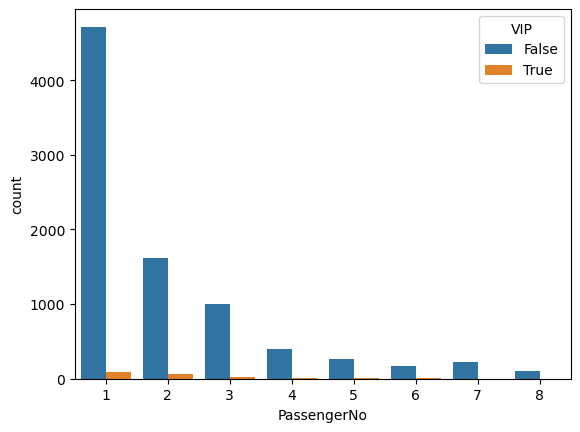

In [24]:
df.drop(['RoomNo'], axis=1, inplace=True)

sb.countplot(data=df, x = 'PassengerNo', hue='VIP')
plt.show()

In [25]:
df["Cabin"][0]

'B/0/P'

In [26]:
new = df["Cabin"].str.split("/", n=2, expand=True)
data["F1"] = new[0]
df["F2"] = new[1].astype(int)
df["F3"] = new[2]

df.drop(['Cabin'], axis=1, inplace=True)

In [27]:
df['LeasureBill'] = df['RoomService'] + df['FoodCourt']+ df['ShoppingMall'] + df['Spa'] + df['VRDeck']

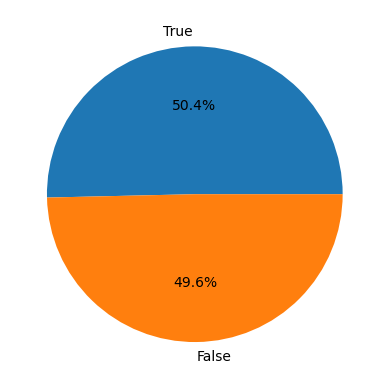

In [28]:
x = df['Transported'].value_counts()
plt.pie(x.values, labels=x.index, autopct='%1.1f%%')
plt.show()

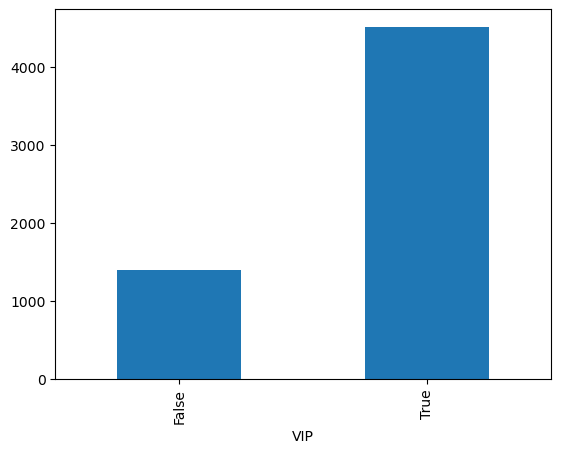

In [29]:
df.groupby('VIP').mean(numeric_only=True)['LeasureBill'].plot.bar() # Add numeric_only=True to handle potential non-numeric columns
plt.show()

In [30]:
for col in df.columns:
    if df[col].dtype == object:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)

df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,PassengerNo,F2,F3,LeasureBill
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0.0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1,1,0,1,736.0
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,2,0,1,10383.0
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,2,0,1,5176.0
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1,1,1,1091.0


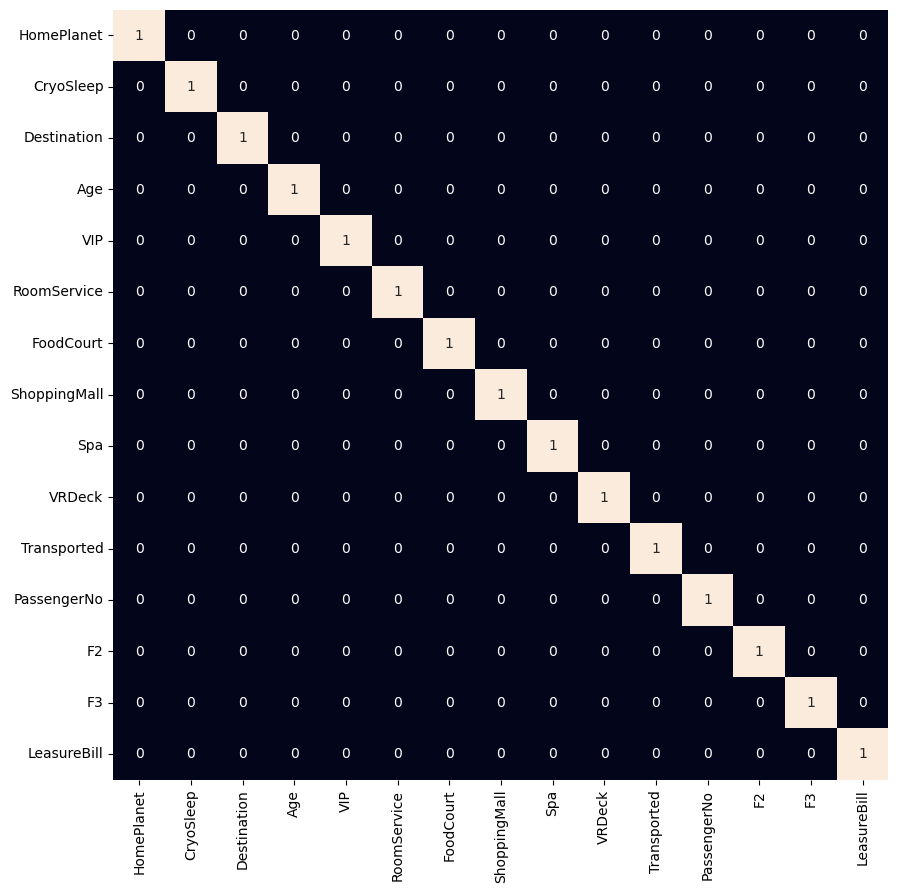

In [31]:
plt.figure(figsize=(10,10))
sb.heatmap(df.corr()>0.8,annot=True,cbar=False)
plt.show()

In [32]:
features = df.drop(['Transported'], axis=1)
target = df.Transported

X_train, X_val,Y_train, Y_val = train_test_split(features, target, test_size=0.1, random_state=22)

X_train.shape, X_val.shape

((7823, 14), (870, 14))

In [33]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [34]:
from sklearn.metrics import roc_auc_score as ras
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf', probability=True), RandomForestClassifier(random_state=42)]

for i in range(len(models)):
    models[i].fit(X_train, Y_train)

    print(f'{models[i]} : ')

    train_preds = models[i].predict_proba(X_train)[:, 1]
    print('Training Accuracy : ', ras(Y_train, train_preds))

    val_preds = models[i].predict_proba(X_val)[:, 1]
    print('Validation Accuracy : ', ras(Y_val, val_preds))
    print()

LogisticRegression() : 
Training Accuracy :  0.8690376496826604
Validation Accuracy :  0.8572889727392208

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  0.9834723291613665
Validation Accuracy :  0.8761711959977955

SVC(probability=True) : 
Training Accuracy :  0.8

LogisticRegression() : 


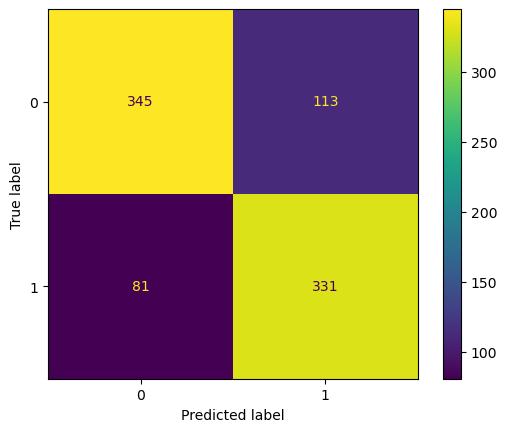

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 


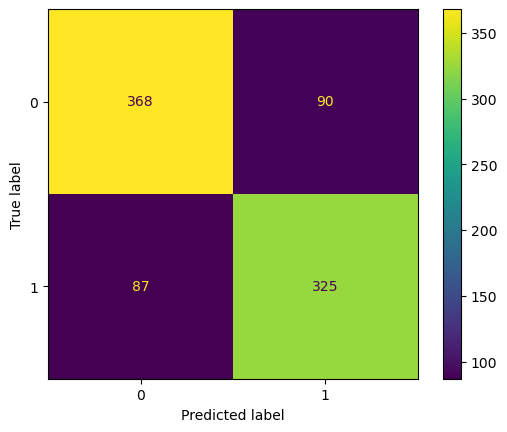

SVC(probability=True) : 


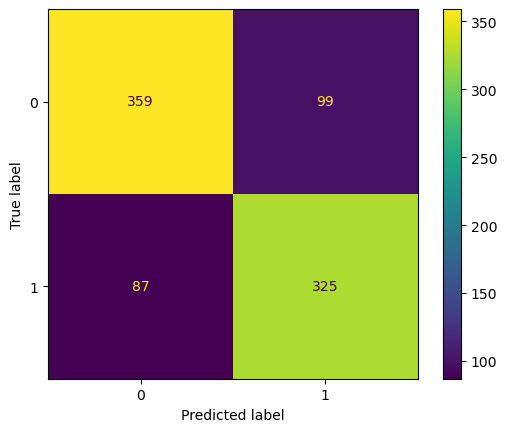

RandomForestClassifier(random_state=42) : 


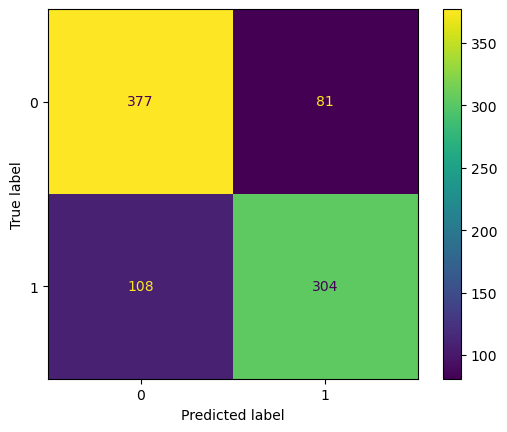

In [35]:
for i in range(len(models)):
    print(f'{models[i]} : ')
    y_pred = models[i].predict(X_val)
    cm = metrics.confusion_matrix(Y_val, y_pred)
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()
print()

In [36]:
for i in range(len(models)):
    print(f'{models[i]} : ')
    print(metrics.classification_report(Y_val, models[i].predict(X_val)))
print()

LogisticRegression() : 
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       458
           1       0.75      0.80      0.77       412

    accuracy                           0.78       870
   macro avg       0.78      0.78      0.78       870
weighted avg       0.78      0.78      0.78       870

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_